# Deep learning Portfolio 1
Jesse, Sami, Luca


In [ ]:
#mounting Google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing necessary libraries

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [ ]:
inputPath = "/content/drive/MyDrive/Projects/Deeplearning1"
inputPathtrain = '/content/drive/MyDrive/Projects/Deeplearning1/Train'

example image data in an array

In [ ]:
example = cv2.imread(inputPath + "/Train/1.jpg")
example

array([[[100, 126, 156],
        [110, 137, 164],
        [127, 154, 181],
        ...,
        [ 54,  42,  62],
        [ 49,  38,  58],
        [ 43,  32,  52]],

       [[114, 140, 170],
        [120, 147, 174],
        [120, 147, 173],
        ...,
        [ 48,  37,  57],
        [ 44,  33,  53],
        [ 40,  31,  51]],

       [[118, 147, 174],
        [128, 157, 184],
        [117, 148, 171],
        ...,
        [ 41,  32,  53],
        [ 38,  29,  50],
        [ 38,  31,  52]],

       ...,

       [[199, 192, 195],
        [203, 197, 202],
        [199, 199, 205],
        ...,
        [196, 163, 144],
        [131,  86,  65],
        [101,  53,  29]],

       [[199, 194, 196],
        [200, 197, 199],
        [197, 200, 204],
        ...,
        [181, 145, 127],
        [124,  81,  64],
        [136,  93,  74]],

       [[201, 196, 198],
        [197, 196, 198],
        [194, 197, 201],
        ...,
        [159, 123, 105],
        [127,  86,  71],
        [181, 138, 123]]

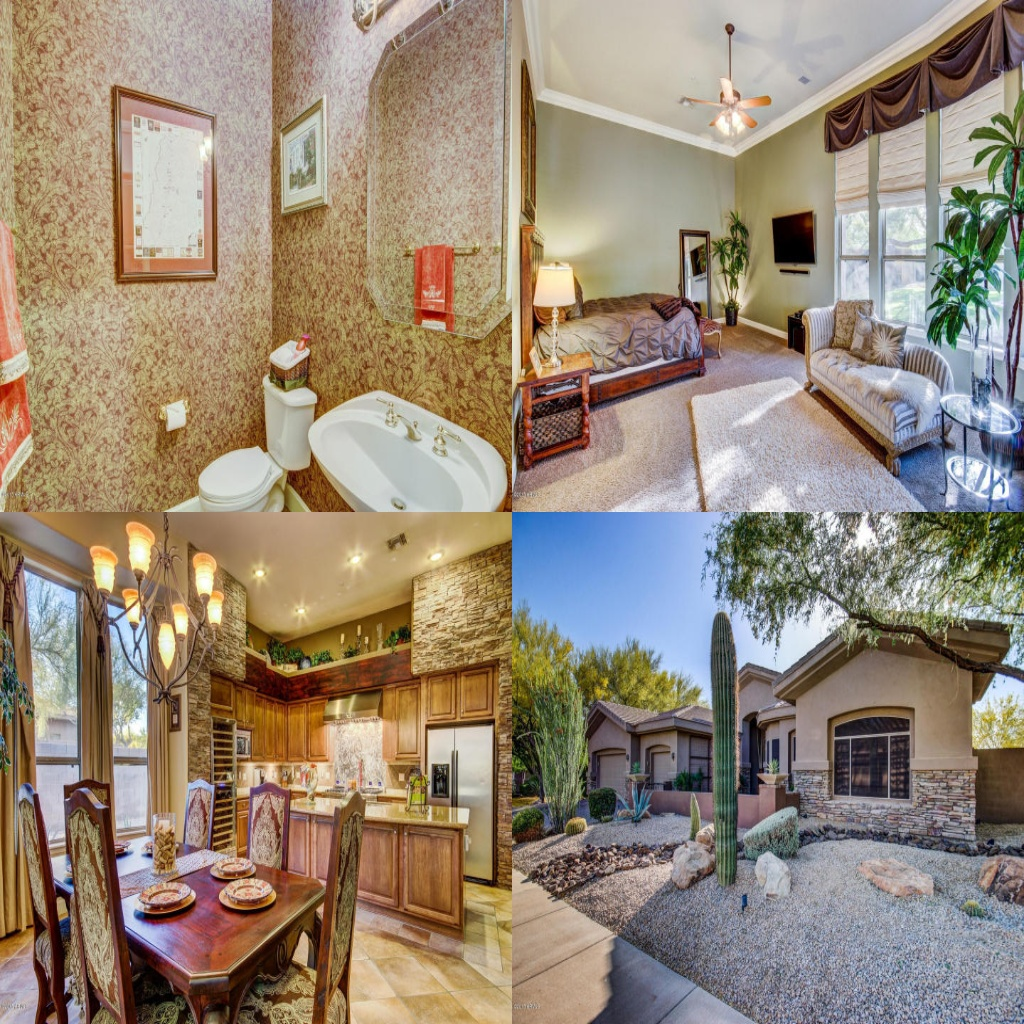

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(example)

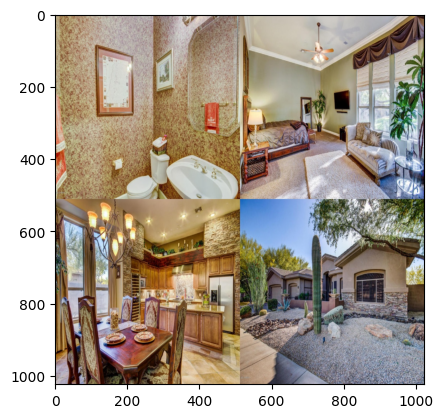

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(example[...,::-1])

Creating The dataframes from "train.csv" and "test.csv"

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split


train_df = pd.read_csv(os.path.join(inputPath, "train.csv"))
test_df = pd.read_csv(os.path.join(inputPath, "test.csv"))


print(train_df.head())
print(test_df.head())


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude
0       501         3        2.0  2330   35.6406  -120.7003
1       502         3        2.5  1339   35.6406  -120.7003
2       503         3        2.0  1472   35.6406  -120.7003
3       504         4        4.0  2681   35.6406  -120.7003
4       505         3        2.5  1935   33.8085  -117.9228


In [ ]:
num_train_images = len(os.listdir(os.path.join(inputPath, "Train")))
num_test_images = len(os.listdir(os.path.join(inputPath, "Test")))

train_filenames = [str(i) + ".jpg" for i in range(1, num_train_images + 1)]
test_filenames = [str(i) + ".jpg" for i in range(1, num_test_images + 1)]

train_labels = train_df["House ID"]
test_labels = test_df["House ID"]

train_files = [os.path.join(inputPath, "Train", filename) for filename in train_filenames]
test_files = [os.path.join(inputPath, "Test", filename) for filename in test_filenames]


print(train_files)
print(test_files)

['/content/drive/MyDrive/Projects/Deeplearning1/Train/1.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/2.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/3.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/4.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/5.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/6.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/7.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/8.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/9.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/10.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/11.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/12.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/13.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/14.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/15.jpg', '/content/drive/MyDrive/Projects/Deeplearning1/Train/16.jpg', '/content/drive/

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.DataFrame(train_df)

print(train_df.head())

print(train_df.describe())

print(train_df.isnull().sum())
# no NAN values
#latitude values are close together same goes for longitude.
#nothing unexpected


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
         House ID    Bedrooms   Bathrooms        Area    Latitude   Longitude  \
count  500.000000  500.000000  500.000000   500.00000  500.000000  500.000000   
mean   250.500000    3.350000    2.669500  2369.64600   35.128844 -116.469049   
std    144.481833    1.172283    1.017578  1208.18261    2.386173    6.554434   
min      1.000000    1.000000    1.000000   701.00000   32.631500 -122.368300   
25%    125.750000    2.000000    2.000000  1440.00000   33.808200 -119.802500   
50%    250.500000    3.000000    2.500000  2097.50000   33.920800 -117.609600   
75%    375.250000    4.00

In [ ]:
test_df
#latitude/longitude values are the same or close together

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude
0,501,3,2.0,2330,35.6406,-120.7003
1,502,3,2.5,1339,35.6406,-120.7003
2,503,3,2.0,1472,35.6406,-120.7003
3,504,4,4.0,2681,35.6406,-120.7003
4,505,3,2.5,1935,33.8085,-117.9228
5,506,3,2.0,1471,33.8085,-117.9228
6,507,3,2.0,1248,33.8085,-117.9228
7,508,3,1.5,1214,33.8085,-117.9228
8,509,4,3.0,1882,33.8085,-117.9228
9,510,2,2.5,987,33.8085,-117.9228


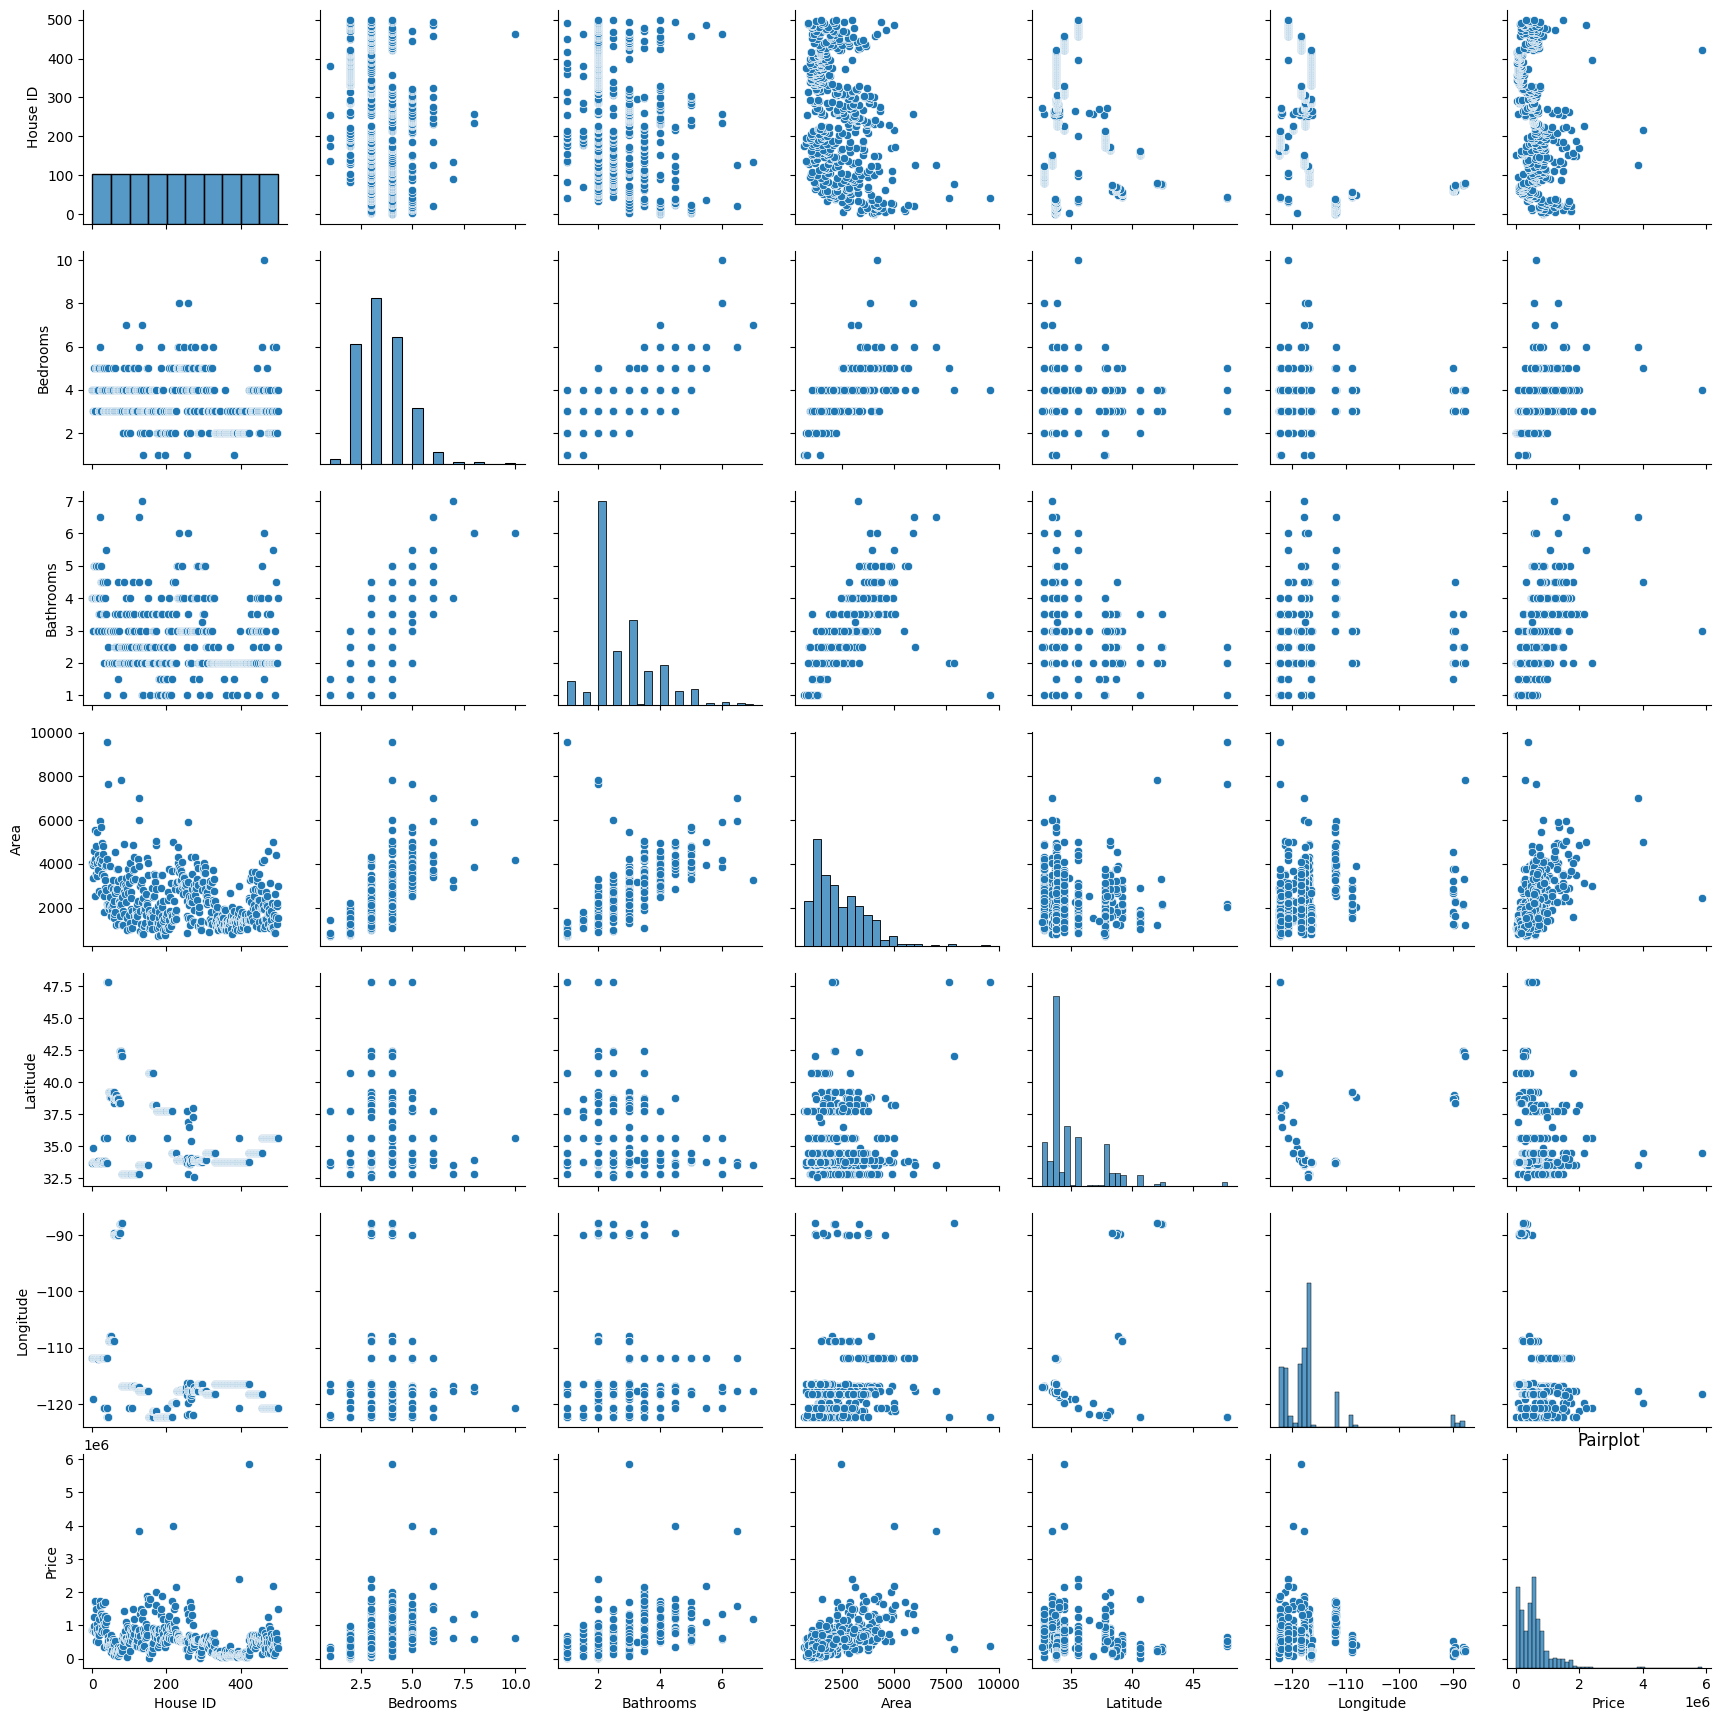

In [ ]:

sns.pairplot(train_df)
plt.title('Pairplot')
plt.show()



Prices have high variance with some outliers.
Bedrooms, Bathrooms, Area values seem to go to the top right in comparison to Price wich indicates that these 3 have high correlation with the price and are the most important columns.

We also see Bathrooms arent always integers. we also see values like 1.5, 2.5 etc. This probaply means these bathrooms only contain toilets.
As stated before we clearly see some houses have the same longitude and latitude values. this means the selection of houses seems to have a bias. We dont have a way to negate this exept adjust the weights if needed.
We chose Pairplots because it shows a lot it different perspectives and viewpoints into the structure of the data.

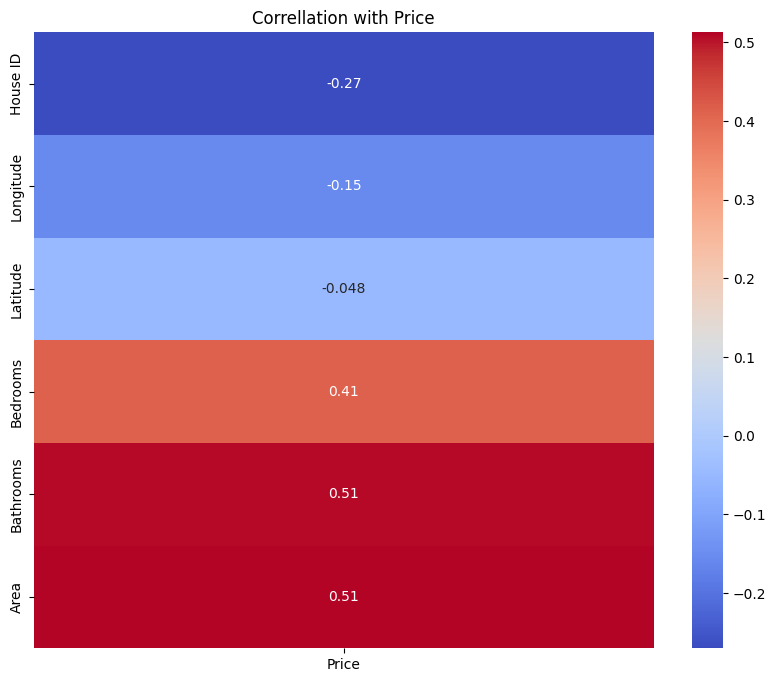

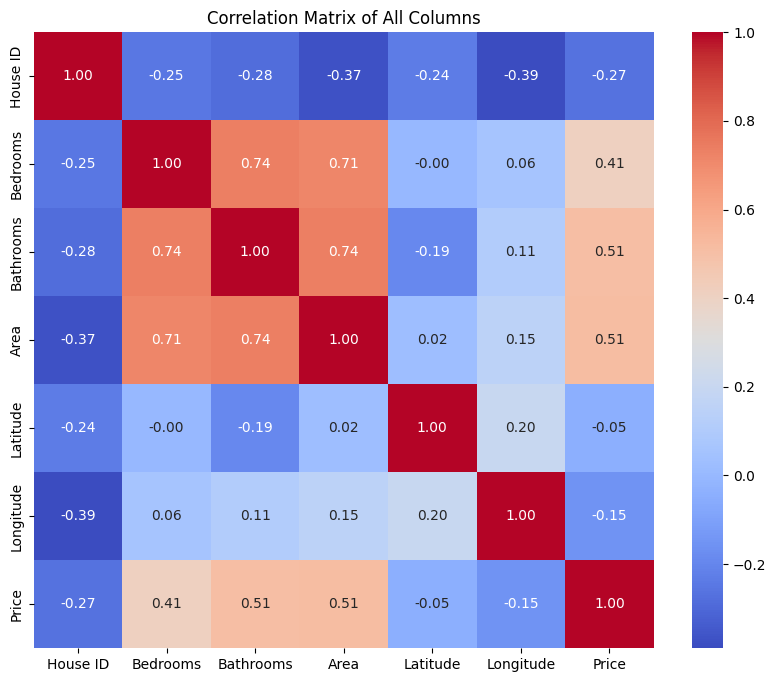

In [ ]:
plt.figure(figsize=(10, 8))
price_corr = train_df.corr()['Price'].drop('Price',)
price_corr_sorted = price_corr.sort_values()
sns.heatmap(price_corr_sorted.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correllation with Price')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()



Area, Bathrooms and Bedrooms all have high correlations to the Price, we also see these 3 all correlate to eachother to a relatively high degree.
This is logical since a expensive large house probaply has more bed/bathrooms than average.

We chose to show correlation to price seperatly because it is the most important, we also showed correlation between other columns because like we see now some columns might be correlated to eachother what could explain why multiple columns have close to the same correlation to the Price column, for example Bedrooms and Bathrooms

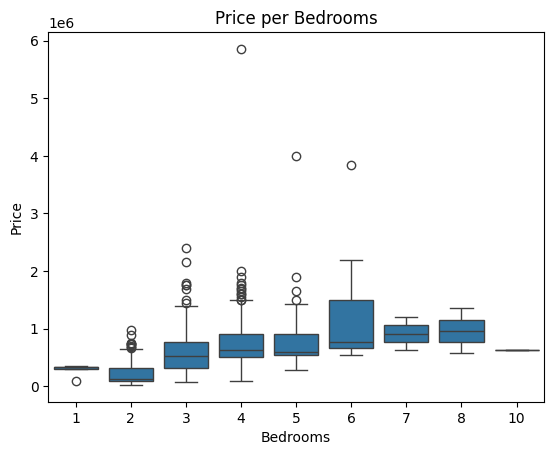

In [ ]:
plt.figure()
sns.boxplot(x='Bedrooms', y='Price', data=train_df)
plt.title('Price per Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

we see a small set of 1 bedroom houses, a lot of outlier houses with 3,4,5 bedrooms in comparison others even if they contain a larger set of values.

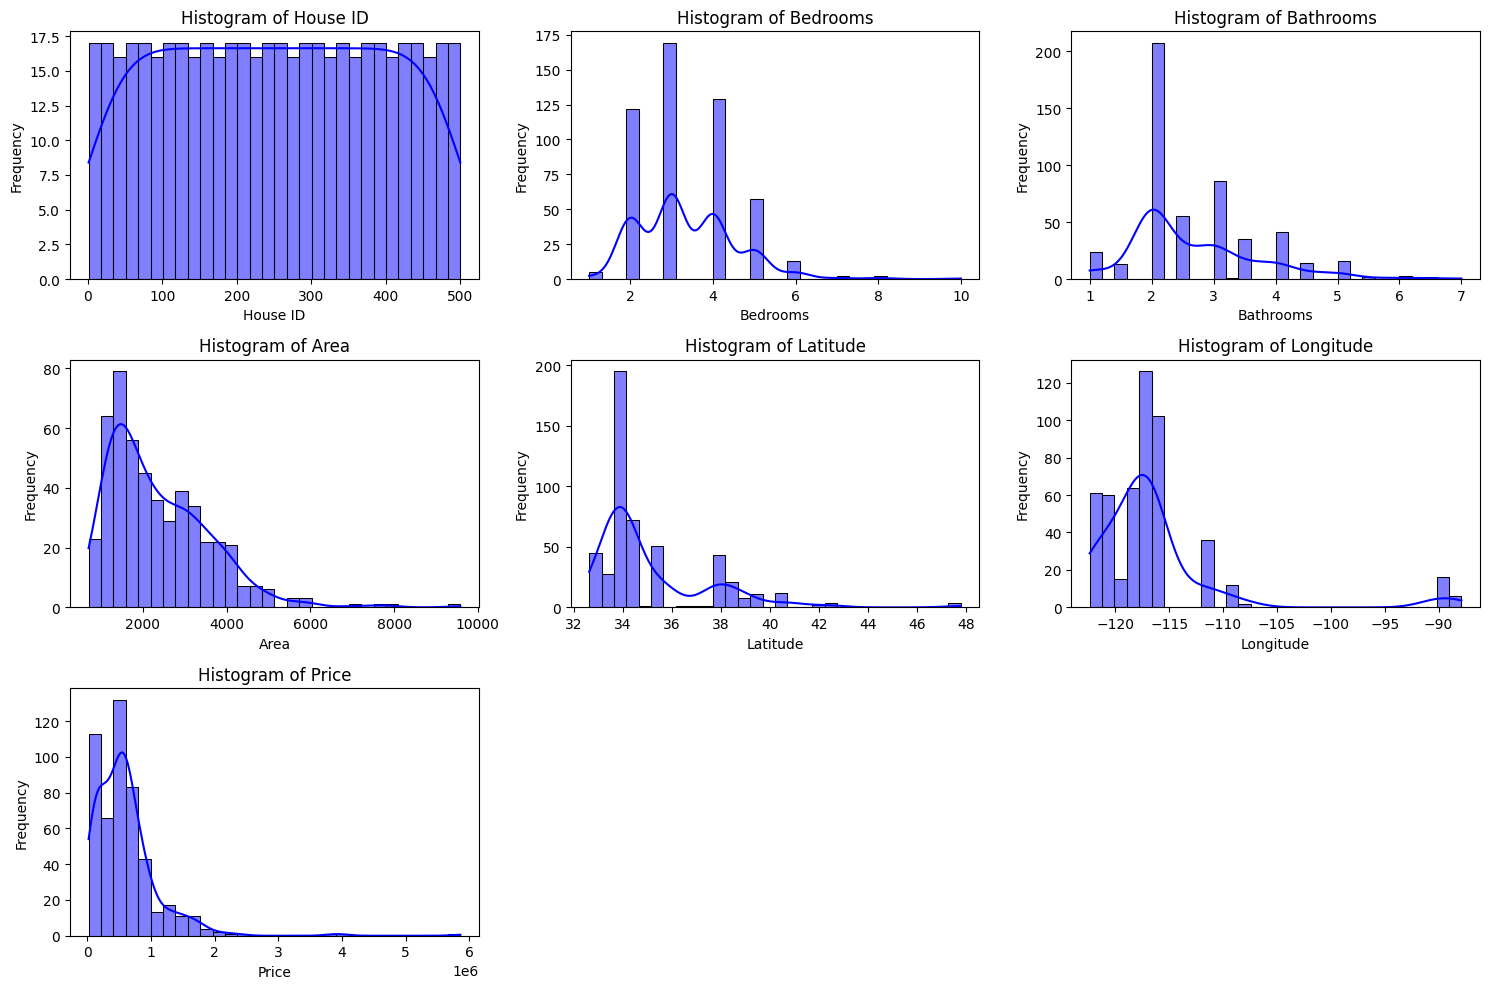

In [ ]:
plt.figure(figsize=(15, 10))
for i, c in enumerate(train_df.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[c], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



all graphs seem to be right-skewed, good visualisation of how much price, Area, Bathrooms and Bedroom frequency distributions look alike
We chose for histograms because the explained features are best visualised in this way and shows how how frequent outliers are and where they are

Shape of X_train: (400, 5)
Shape of y_train: (400,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11649 (45.50 KB)
Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________

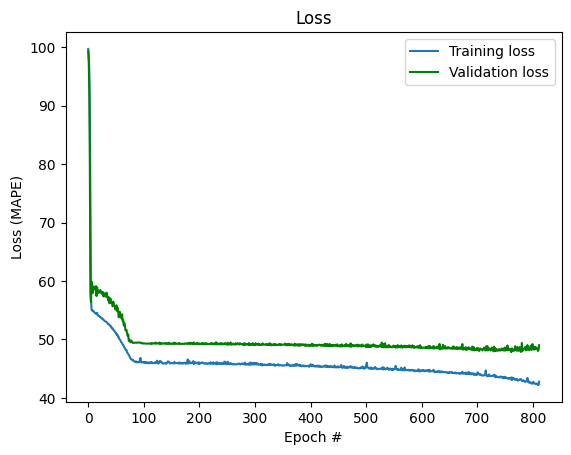

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

x_train = train_df.drop(columns=['House ID', 'Price']).values
y_train = train_df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

model = Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="relu")
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_absolute_percentage_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.1, epochs=1000, batch_size=20, verbose=1, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MAPE)')
plt.title('Loss')
plt.legend()
plt.show()

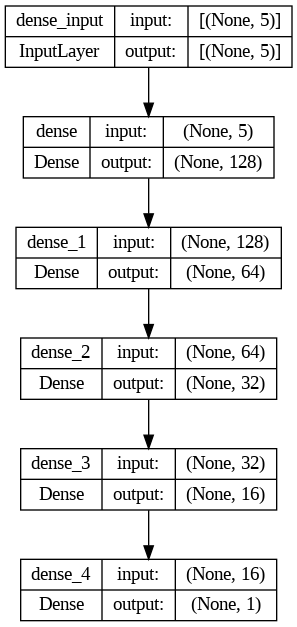

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model structure
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#bron: https://chat.openai.com/share/410f8111-1c61-4eb2-b787-ae60b038640f

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import os
import cv2

def read_images_from_directory(directory_path, num_images):
    images = []
    labels = []
    for i in range(1, num_images + 1):
        image_path = os.path.join(directory_path, f"{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append(image)
                label = int(os.path.splitext(os.path.basename(image_path))[0])
                labels.append(label)
    return images, labels


train_directory = os.path.join(inputPath, "Train")
num_images = 500
train_images, train_labels = read_images_from_directory(train_directory, num_images)

x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

input_shape = x_train[0].shape

x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

indices = np.random.choice(len(x_train), size=9, replace=False)

for count, value in enumerate(indices):
    plt.subplot(3, 3, count+1)
    plt.imshow(x_train[value], cmap="gray")
    plt.title(y_train[value])

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

def display_histograms(images, num_samples=5):
    for i, image in enumerate(images[:num_samples]):
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(histogram, color='black')
    plt.title('Example histograms of pixel values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

num_images = len(train_images)
print("Number of images in the dataset:", num_images)

image_sizes = np.array([image.shape[:2] for image in train_images])
print("Average image size:", np.mean(image_sizes, axis=0))

num_channels = np.array([image.shape[2] if len(image.shape) == 3 else 1 for image in train_images])
print("Average number of color channels:", np.mean(num_channels))

display_images(train_images)
display_histograms(train_images)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()
